In [13]:
import numpy as np
import numpy.random as rd
import pandas as pd
from scipy.stats import norm
from matplotlib import pyplot as plt

In [40]:
p0 = 0
S0 = 100
K = 90
sigma = 0.15
r = 0.03
T = 1
N = 100

tg = np.linspace(0, T, N+1)
dt = T / N

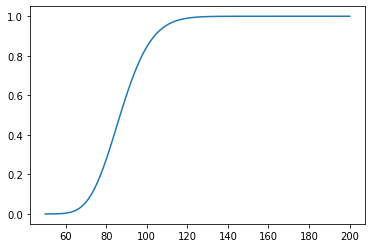

In [49]:
def BS_delta(S, t, old_delta):
    tau = T - t
    vol_tot = sigma * np.sqrt(tau)
    log_fwd_moneyness = np.log(S / K) + r * tau
    d1 = log_fwd_moneyness / vol_tot + vol_tot / 2
    return norm.cdf(d1) - old_delta

x = np.linspace(S0/2, S0*2, 100)
_ = plt.plot(x, BS_delta(x, sigma, 0))

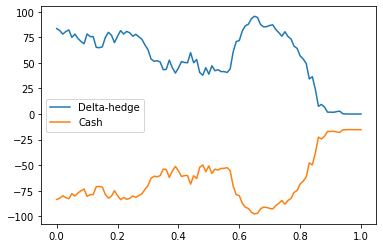

In [63]:
get_delta = BS_delta

stocks, cashes = [], []

S = S0
delta = 0
cash = p0
for t in tg[:-1]: # Not last time, because vol_tot will be 0
    # Computation of the new hedge
    dDelta = get_delta(S, t, delta)
    delta += dDelta
    cash  -= dDelta * S
    
    # Logging
    stocks.append(delta * S)
    cashes.append(cash)
    
    # Update the world
    dW = np.sqrt(dt) * rd.standard_normal()
    S += S * (r * dt + sigma * dW)
    cash += cash * r * dt

# We close the positions
cash += delta * S
delta = 0
stocks.append(0)
cashes.append(cash)

plt.plot(tg, stocks, label="Delta-hedge")
plt.plot(tg, cashes, label="Cash")
plt.legend()
pass